## 1. Reglas de asociación

### En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las ﬁlas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y conﬁanza de 0,25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

In [2]:
import sklearn

In [3]:
import csv
groceries = []
groceries_file = csv.reader(open("groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)

In [4]:
print groceries[0:2]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee']]


In [5]:
import apriori

In [6]:
F_015, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True) # support with 0.15

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


In [7]:
F_005, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)# support with 0.05

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


In [8]:
H = apriori.generate_rules(F_005, soporte, min_confidence=0.25, verbose=True)
# generating general rules with support 0.005 and confidence 0.25 


{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


## 2. Implementación de una regresión “stepwise” con eliminación hacia atrás

### Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb” realizar una implementación del  del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la produce el modelo menos signiﬁcativo. 

In [9]:
import pandas as pd

wine = pd.read_csv('winequality-white.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Definition of target values and variables which will explain the target
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Splitting into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
from sklearn.linear_model import LinearRegression
import numpy
import math

# Modelo para realizar los ajustes
model = LinearRegression()

feature_order = range(len(features))
feature_error = []
feature_range = []

for i in range(len(features)-1):
    idx_try = [val for val in range(len(features)) if val in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.remove(i_try)

        use_train = x_train[x_train.columns[useRow]]
        use_test = x_test[x_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/math.sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)
    feature_order.remove(idx_try[pos_best])
    feature_range.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)-1):
    print "En el paso", i, "se ha eliminado la varible", features[feature_range[i]], "con un error", feature_error[i]

En el paso 0 se ha eliminado la varible citric acid con un error 0.738884455694
En el paso 1 se ha eliminado la varible total sulfur dioxide con un error 0.738114235973
En el paso 2 se ha eliminado la varible chlorides con un error 0.738148762221
En el paso 3 se ha eliminado la varible alcohol con un error 0.739720735081
En el paso 4 se ha eliminado la varible free sulfur dioxide con un error 0.741532570185
En el paso 5 se ha eliminado la varible sulphates con un error 0.744925739871
En el paso 6 se ha eliminado la varible fixed acidity con un error 0.757283473849
En el paso 7 se ha eliminado la varible pH con un error 0.760590133243
En el paso 8 se ha eliminado la varible volatile acidity con un error 0.784184677283
En el paso 9 se ha eliminado la varible residual sugar con un error 0.82313571398


## 3. Estimación de la supervivencia de los pasajeros del Titanic

### Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.

### Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque. En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las ﬁlas con estos valores se puede utilizar el siguiente comando: mask	=	titanic[['age',	'fare']].applymap(lambda	x:	math.isnan(x))	titanic	=	titanic[-mask.any(axis	=	1)]


In [12]:
import numpy as np
import pandas as pd
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyparsing
import pydot   

In [13]:
overview = pd.read_csv("titanic.csv")

In [14]:
overview.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
overview.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [16]:
import csv
with open('titanic.csv', 'rb') as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',')
    
    # Header contains feature names
    row = titanic_reader.next() 
    feature_names = np.array(row)
    
    # Load dataset, and target classes
    titanic_X, titanic_y = [], []
    for row in titanic_reader:  
        titanic_X.append(row)
        titanic_y.append(row[1]) # The target value is "survived" 2nd column
    
    titanic_X = np.array(titanic_X)
    titanic_y = np.array(titanic_y)



In [17]:
titanic_X # titanic_X is a vector generated from all rows


array([['1', '1', 'Allen, Miss. Elisabeth Walton', ..., '2', '',
        'St Louis, MO'],
       ['1', '1', 'Allison, Master. Hudson Trevor', ..., '11', '',
        'Montreal, PQ / Chesterville, ON'],
       ['1', '0', 'Allison, Miss. Helen Loraine', ..., '', '',
        'Montreal, PQ / Chesterville, ON'],
       ..., 
       ['3', '0', 'Zakarian, Mr. Mapriededer', ..., '', '304', ''],
       ['3', '0', 'Zakarian, Mr. Ortin', ..., '', '', ''],
       ['3', '0', 'Zimmerman, Mr. Leo', ..., '', '', '']], 
      dtype='|S82')

In [18]:
titanic_y # titanic_y is a vector generated from 2nd row, shows whether survived or not.

array(['1', '1', '0', ..., '0', '0', '0'], 
      dtype='|S1')

In [19]:
# Double checking if all entries are existent
count = titanic_y.astype(int)
np.bincount(count)

array([809, 500], dtype=int64)

In [20]:
feature_names # feature_names are the column names

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], 
      dtype='|S9')

In [21]:
print feature_names, titanic_X[0], titanic_y[0] # example of first row

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest'] ['1' '1' 'Allen, Miss. Elisabeth Walton' 'female' '29' '0' '0' '24160'
 '211.3375' 'B5' 'S' '2' '' 'St Louis, MO'] 1


In [22]:
# There are several feature names, which will not help our prediction. These, are therefore, excluded from the
# analysis. For example: name or home destination should not have any impact on whether someone survived 
# or not.

In [23]:
# we keep the class, the age and the sex variable. Arguably, one could include 'fare' aswell
# , but it should be similar to class
titanic_X = titanic_X[:, [0, 3, 4]]
feature_names = feature_names[[0, 3, 4]]
print feature_names
print titanic_X[12], titanic_y[12]

['pclass' 'sex' 'age']
['1' 'female' '24'] 1


In [24]:
print titanic_X[10:20,2] ## There are missing values in age
print feature_names
print titanic_X[15], titanic_y[15]


['47' '18' '24' '26' '80' '' '24' '50' '32' '36']
['pclass' 'sex' 'age']
['1' 'male' ''] 0


In [25]:
# These should be eliminated and replaced with mean of age.

In [26]:
ages = titanic_X[:, 2] # generating vector of third column (age)
mean_age = np.mean(titanic_X[ages != '', 2].astype(np.float)) # mean_age for vector ages, excluding ''
print mean_age


29.8811376673


In [27]:
mean_age_round = mean_age.round(0) # rounding of age
print mean_age_round

30.0


In [28]:
titanic_X[titanic_X[:, 2] == '', 2] = mean_age_round # replacing '' with rounded mean of ages
print feature_names
print titanic_X[10:16]
print titanic_y[10:16]

['pclass' 'sex' 'age']
[['1' 'male' '47']
 ['1' 'female' '18']
 ['1' 'female' '24']
 ['1' 'female' '26']
 ['1' 'male' '80']
 ['1' 'male' '30.0']]
['0' '1' '1' '1' '1' '0']


In [29]:
# The categorical variables 'sex' and 'class' will have to be modified to real values. 'sex' is converted to
#a binary value (0=female, 1=male)

In [30]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 1])
print "Categorical variables:", label_encoder.classes_
print 'Feature names:' ,feature_names
print 'Features for instance number 15:',titanic_X[15], titanic_y[15]




Categorical variables: ['female' 'male']
Feature names: ['pclass' 'sex' 'age']
Features for instance number 15: ['1' 'male' '30.0'] 0


In [31]:
# Tranformation of female and male to 0 and 1

In [32]:
integer_classes = label_encoder.transform(label_encoder.classes_)
print "Integer variables:", integer_classes
t = label_encoder.transform(titanic_X[:, 1])
titanic_X[:,1] = t
print 'Feature names:',feature_names
print 'Features for instance number 15:',titanic_X[15], titanic_y[15]

Integer variables: [0 1]
Feature names: ['pclass' 'sex' 'age']
Features for instance number 15: ['1' '1' '30.0'] 0


In [33]:
# A similiar operation has to be performed for categorical variable 'class'. This time there are three values
# '1' , '2' and '3'.

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc = LabelEncoder()
label_encoder = enc.fit(titanic_X[:, 0])
print "Categorical classes:", label_encoder.classes_
print 'Feature names:' ,feature_names
print 'Features for instance number 15:',titanic_X[15], titanic_y[15]
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)
print "Integer classes:", integer_classes

Categorical classes: ['1' '2' '3']
Feature names: ['pclass' 'sex' 'age']
Features for instance number 15: ['1' '1' '30.0'] 0
Integer classes: [[0]
 [1]
 [2]]


In [35]:
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)
# First, convert clases to 0-(N-1) integers using label_encoder
num_of_rows = titanic_X.shape[0]
t = label_encoder.transform(titanic_X[:, 0]).reshape(num_of_rows, 1)
# Second, create a sparse matrix with three columns, each one indicating if the instance belongs to the class
new_features = one_hot_encoder.transform(t)
# Add the new features to titanix_X
titanic_X = np.concatenate([titanic_X, new_features.toarray()], axis = 1)
#Eliminate converted columns
titanic_X = np.delete(titanic_X, [0], 1)
# Update feature names
feature_names = ['sex', 'age', 'first_class', 'second_class', 'third_class']
# Convert to numerical values
titanic_X = titanic_X.astype(float)
titanic_y = titanic_y.astype(float)


In [36]:
print "Passenger travelling in 1st class"
print feature_names
print titanic_X[15]
print "----------"
print "Passenger travelling in 2nd class"
print feature_names
print titanic_X[500]
print "----------"
print "Passenger travelling in 3rd class"
print feature_names
print titanic_X[1000]
print "----------"

Passenger travelling in 1st class
['sex', 'age', 'first_class', 'second_class', 'third_class']
[  1.  30.   1.   0.   0.]
----------
Passenger travelling in 2nd class
['sex', 'age', 'first_class', 'second_class', 'third_class']
[  1.  46.   0.   1.   0.]
----------
Passenger travelling in 3rd class
['sex', 'age', 'first_class', 'second_class', 'third_class']
[  1.  30.   0.   0.   1.]
----------


In [37]:
print 'Feature names:' ,feature_names
print 'Features for instance number 15:',titanic_X[15], titanic_y[15]

Feature names: ['sex', 'age', 'first_class', 'second_class', 'third_class']
Features for instance number 15: [  1.  30.   1.   0.   0.] 0.0


### The preparation of the data is done, now the set has to be split in train and test

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.20, random_state=30)

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=6)
# max depth sets a limit to the dimensions
clf = clf.fit(X_train,y_train)



#### VISUALIZE THE DECISION TREE#####

In [40]:
# I had to install Graphviz2.38 and add it to the system path
# before importing pydot and pyparsing, these version were installed:
# pip install pyparsing==1.5.7
#pip install pydot==1.0.28, after installation I added them to the top import section. 

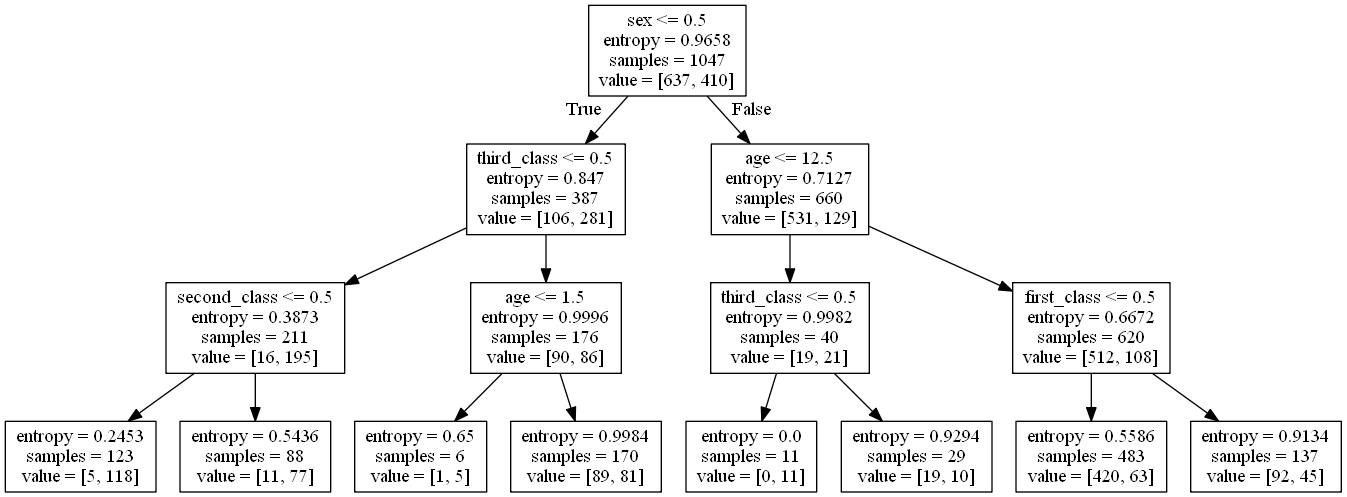

In [41]:
import StringIO
dot_data = StringIO.StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=['sex', 'age', 'first_class', 'second_class', 'third_class']) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('titanic.png') 
from IPython.core.display import Image 
Image(filename='titanic.png')

In [42]:
#### According to the decision tree the main criteria (root node) for survival is the sex of the passenger.
#### In the left subtree are the female passengers (sex = 0) , in the right subtree the male (sex=1). 

In [43]:
#### At every node you have to ask the corresponding question:
#### Let's asume we want to know the survival for a man, 50 years of age and first class
#### 1st node: sex <=0.5? No, so you go to the right
#### 2nd node: age <= 12.5? No, so you go to the right
#### 3rd node: firstclass < 0.5? Yes, so to the legt 
#### We are at the second last node on the right, as value of died(390) is bigger than survived (60)
#### , the passenger would not survive. 

In [44]:
#### Another exmaple: girl, 1 year old, second class
#### 1st node: sex <=0.5? Yes, so you go to the left
#### 2nd node: thirdclass? No, so you go the right
#### 3rd node: age < 1,5? Yes, to the left. 
#### The girl would survive, as 1 died and 5 survived. 


### In the following we show the confusion matrix, Accuracy, Precision, Recall, FI and ROC in the training set to check quality

In [45]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [46]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Accuracy:', accuracy_score(y_true, y_pred)
    print 'Precision:', precision_score(y_true, y_pred)
    print 'Recall:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)
  
# Ejemplo de resultado
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]



La matriz de confusión es 
[[578  59]
 [103 307]]
Accuracy: 0.845272206304
Precision: 0.838797814208
Recall: 0.748780487805
F1: 0.791237113402
AUC: 0.828079411877


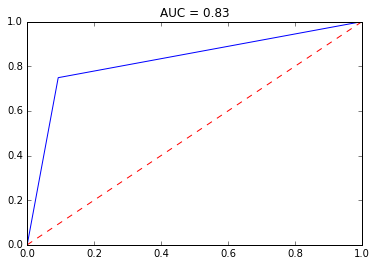

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred        = dt_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

### Quality of the test set

La matriz de confusión es 
[[152  20]
 [ 30  60]]
Accuracy: 0.809160305344
Precision: 0.75
Recall: 0.666666666667
F1: 0.705882352941
AUC: 0.77519379845


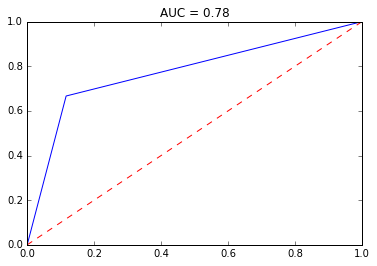

In [48]:
y_pred     = dt_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

In [49]:
# Sex ist the most important variable followed by age
print feature_names
print dt_classifier.feature_importances_

['sex', 'age', 'first_class', 'second_class', 'third_class']
[ 0.4806657   0.32560532  0.02928717  0.01025491  0.1541869 ]


### Testing logistic regression

La matriz de confusión es 
[[534 103]
 [129 281]]
Accuracy: 0.77841451767
Precision: 0.731770833333
Recall: 0.685365853659
F1: 0.707808564232
AUC: 0.761835203124


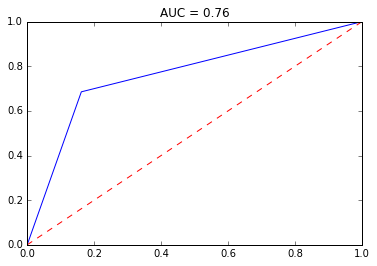

In [50]:
from sklearn.linear_model.logistic import LogisticRegression

classifier = LogisticRegression().fit(X_train, y_train)
y_pred     = classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[150  22]
 [ 29  61]]
Accuracy: 0.80534351145
Precision: 0.734939759036
Recall: 0.677777777778
F1: 0.705202312139
AUC: 0.774935400517


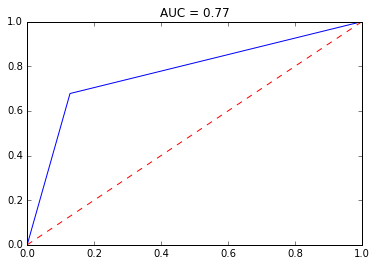

In [51]:
y_pred     = classifier.predict(X_test)

metricas_modelos(y_test, y_pred)

### Testing random forests

La matriz de confusión es 
[[565  72]
 [ 94 316]]
Accuracy: 0.841451766953
Precision: 0.814432989691
Recall: 0.770731707317
F1: 0.791979949875
AUC: 0.828850940001


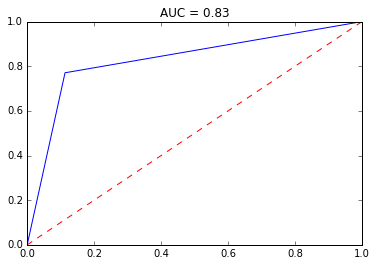

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier().fit(X_train, y_train)
y_pred        = rf_classifier.predict(X_train)

metricas_modelos(y_train, y_pred)

La matriz de confusión es 
[[151  21]
 [ 27  63]]
Accuracy: 0.81679389313
Precision: 0.75
Recall: 0.7
F1: 0.724137931034
AUC: 0.788953488372


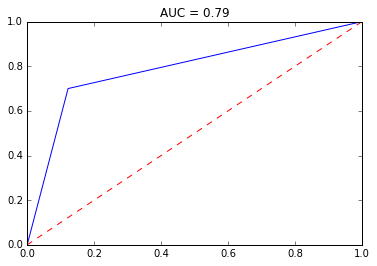

In [53]:
y_pred     = rf_classifier.predict(X_test)

metricas_modelos(y_test, y_pred)